In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display
plt.style.use('rose-pine-moon')
my_cmap = plt.get_cmap('viridis')
%matplotlib inline

In [2]:
def figure_properties(ax, xlim, ylim):
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.grid(True)

### 1. Iterated Integrals and Area

#### 1.1 Intuition

Consier the following example: <br><br>
$f_x(x, y) = 2xy \\[1em]
\Rightarrow \int f_x(x, y) = \int 2xy \\[1em]
\Rightarrow f_x(x, y) =  x^2y + C(y)
$ <br><br>
In case of multivariable functions, C has a **derivative of 0 with respect to x**,  so it could be any expression that contains only constants and functions of y. <br><br>
*EXAMPLE*: $\displaystyle \int_1^{2y} 2xy \,dx.$


In [3]:
x, y = sp.symbols('x,y')
expr = 2*x*y
sp.integrate(expr, (x, 1, 2*y))

4*y**3 - y

*EXAMPLE*: $\displaystyle \int_1^x\big(5x^3y^{-3}+6y^2\big) \,dy$

In [4]:
x, y = sp.symbols('x,y')
expr = 5*(x**3)*(y**(-3)) + 6 * y**2
sp.integrate(expr, (y, 1, x))

9*x**3/2 - 5*x/2 - 2

**Note:**
- When integrating with respect to *x*, the bounds are functions of *y* and the final result is also a function of *y*.
- When integrating with respect to *y*, the bounds are functions of *x* and the final result is also a function of *x*.

#### 1.2 Integrating an integral

Integrating a function with repsect to *x* and than *y* (or vice-versa) is often referred to as **iterated integration**. <br><br>
*EXAMPLE*: $\displaystyle \int_1^2\left(\int_1^x\big(5x^3y^{-3}+6y^2\big) \,dy\right) \,dx.$

In [5]:
x, y = sp.symbols('x,y')
expr = 5*(x**3)*(y**(-3)) + 6 * y**2
sp.integrate(expr, (y, 1, x), (x,1,2))

89/8

#### 1.3 Area of a Plane region

Consider the plane region *R* bounded by: <br><br>
A. $a \leq x \leq b$ <br><br>
B. $g_1(x) \leq y \leq g_2(x)$. <br><br>
Then the area of *R* is given by: <br><br>
$ \int_a^b (g_2(x) - g_1(x)) dx$. <br><br>
We can simplify the expression $(g_2(x) - g_1(x))$ as <br><br> $(g_2(x) - g_1(x)) = \int_{g_1(x)}^{g_2(x)} dy$ <br><br>
meaning we can express the area of *R* as an iterated integral <br><br>
area of *R* = $ \displaystyle \int_a^b  \left(\int_{g_1(x)}^{g_2(x)} dy\right) dx$ <br><br>
*EXAMPLE*: Find the area A of the triangle with vertices at (1,1), (3,1) and (5,5)

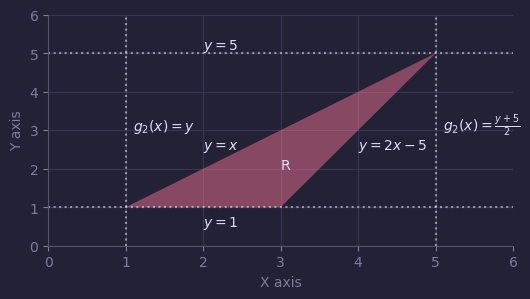

In [6]:
p = np.array([[1,1],[3,1],[5,5]]).T

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.fill(p[0], p[1], alpha=0.5)

# display text
ax.text(3,2, 'R')
ax.text(2, 0.5, r'$y = 1$')
ax.text(4, 2.5, r'$y = 2x - 5$')
ax.text(2, 2.5, r'$y=x$')
ax.text(1.1, 3, r'$g_2(x) = y$')
ax.text(5.1, 3, r'$g_2(x) = \frac{y+5}{2}$')
ax.text(2, 5.1, r'$y = 5$')

# vlines and hlines
ax.axhline(1, ls=':', color='snow', alpha=0.5)
ax.axhline(5, ls=':', color='snow', alpha=0.5)
ax.axvline(1, ls=':', color='snow', alpha=0.5)
ax.axvline(5, ls=':', color='snow', alpha=0.5)

figure_properties(ax, (0, 6), (0, 6))

In [7]:
area = sp.integrate(1, (x,y, 0.5*y + 2.5), (y, 1, 5))
area

4.00000000000000

*EXAMPLE*: Find the area of the region enclosed by $y=2x$ and $y=x^2$

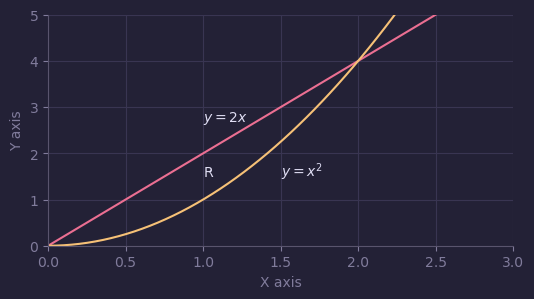

In [8]:
t = np.linspace(0, 5, 100)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)

ax.plot(t, 2*t)
ax.plot(t, t**2)

# display text
ax.text(1, 2.7, r'$y=2x$')
ax.text(1.5, 1.5, r'$y=x^2$')
ax.text(1,1.5, 'R')

figure_properties(ax, (0, 3), (0, 5))

In [9]:
x, y = sp.symbols('x, y')
area = sp.integrate(sp.integrate(1, (y, x**2, 2*x)), (x, 0, 2))
area

4/3

#### 1.4 Changing Order of Integration

When the inner integral's bounds are constant we reverse order without any change. <br>
When the inner integral's bounds are not constants, it is generally very useful to sketch the bounds to determine what the region we are integrating over looks like. From the sketch we can then rewrite the integral with the other order of integration. <br><br>
*EXAMPLE*: $\displaystyle \int_0^4\int_{y^2/4}^{(y+4)/2}1 \,dx \,dy$

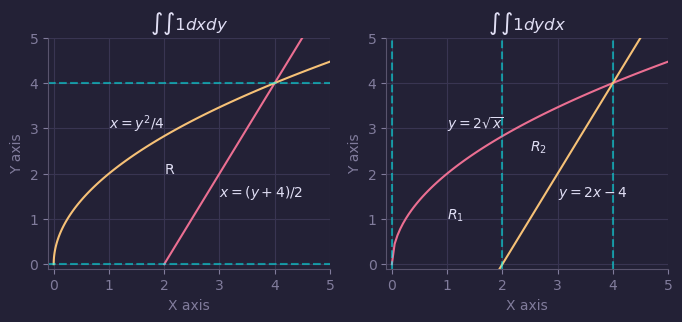

In [10]:
t = np.linspace(0, 5, 100)
fig = plt.figure(figsize=(8,3))

text = [[r'$x = y^2/4$', r'$x = (y+4)/2$'], 
        [r'$y = 2 \sqrt{x}$', r'$y = 2x-4$']]
titles = [r'$\int\int 1 dxdy$', r'$\int\int 1 dydx$']
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    # plot functions
    if i == 0: 
        ax.plot((t+4)/2, t)
        ax.plot(t**2 / 4, t)
        ax.text(2, 2, 'R')
        for j in (0,4):
            ax.axhline(j, color='cyan', ls='--', alpha=0.5)
    elif i == 1:
        ax.plot(t, 2*t**0.5)
        ax.plot(t, 2*t - 4)
        ax.text(1,1, r'$R_1$')
        ax.text(2.5,2.5, r'$R_2$')
        for j in (0,2,4):
            ax.axvline(j, color='cyan', ls='--', alpha=0.5)
        
    # display text
    ax.set_title(titles[i])
    ax.text(1, 3, text[i][0])
    ax.text(3,1.5, text[i][1])
    figure_properties(ax, (-0.1, 5), (-0.1, 5))

Steps to change the order:
1. Express functions in reverse order, i.e <br><br>
 $x=\frac{y^2}{4} \iff y = 2\sqrt{x}\\[1em]
 x = \frac{y+4}{2} \iff y = 2x-4$ <br><br>
2. Change the bounds of integrals by substutting old bounds in new expressions:<br><br>
 *Old bounds*: $0 \leq y \leq 4$. <br><br>
 Note that when integrating along x, sum of two region constitues the orignal regional, so we have two integrals and therefore two bounds: <br><br>
 *New bounds* $0 \leq x \leq 2$ and $2 \leq x \leq 4$.
3. So we can get the the equivalent expression as: <br><br>
$\int_0^4\int_{y^2/4}^{(y+4)/2}1 \,dx \,dy = \int_0^2\int_0^{2\sqrt{x}} 1 \,dy \,dx + \int_2^4\int_{2x-4}^{2\sqrt{x}}1 \,dy \,dx$

### 2. Double Integrals

#### 2.1 Intuition

##### 2.1.1 Recalling Integrals in 2D

(-0.1, 1.1)

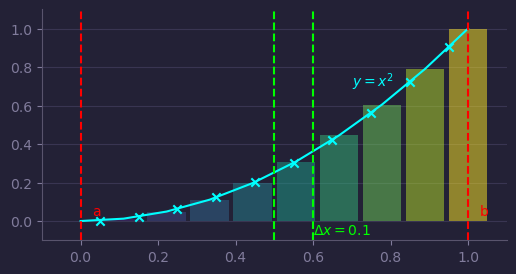

In [11]:
t = np.linspace(0, 1, 10)
u = np.round(np.arange(0.05, 1, 0.1), decimals=2)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)

# main plots
ax.plot(t, t**2, color='cyan')
ax.bar(t, t**2, width=0.1, color=my_cmap(t), alpha=0.5)
ax.scatter(u,u**2, color='cyan', marker='x')

# helper lines and plots
ax.axvline(0, color='red', ls='--')
ax.axvline(1, color='red', ls='--')
ax.axvline(0.5, color='lime', ls='--')
ax.axvline(0.6, color='lime', ls='--')

# helper texts
ax.text(0.03, 0.03, r'a', color='red')
ax.text(1.03, 0.03, r'b', color='red')
ax.text(0.7, 0.7, s=r'$y=x^2$', color='cyan')
ax.text(0.6, -0.07, s=r'$\Delta x = 0.1$', color='lime' )

# figure properties
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

Steps Approximating Area under a function $f(x)$ (in our case $x^2$):
1. Divide the x-axis into n-intervals each of width $\Delta x$. <br>,
**In plot**: [0.5,0.6] interval width is shown by lime in the plot)<br><br>
2. Along each $\Delta x$ draw a rectangle with height of $f(x)$. <br>
**In plot**: Height along curve is shown by *'x'* marker in cyan. <br><br>
3. Summing area of all these rectangels give area under the curve. Mathematically:<br>
$A \approx \displaystyle \sum_{i=1}^n f(x_i)\cdot \Delta x$.

**Integrals**:<br>
If we reduce the width of each recatangle to almost 0 i.e. $\Delta x \to 0$, or in other words we have infinite amount of rectangles under the curve such that each rectangle approximates to a line, we would get the exact area under ther curve by summing them. Mathematically:<br>
$ \displaystyle 
A =\lim\limits_{n\to\infty} \sum_{i=1}^n f(x_i)\cdot \Delta x
\Rightarrow A = \int_a^b f(x) dx
$.<br><br>
in lingual terms *"infinte sum ($\int$) of a function ($f(x)$) is referred to as integral"*.

##### 2.1.2 Expanding the concept to 3D

Comparing 2D and 3D spaces:
- In 2D we were calculating the area by projecting function values $f(x_k)$ across a along x axis.
- In 3D we are doing the same, we are pojecting the function value $f(x_k, y_k)$, but across both x- and y-axis. That is we are now projecting to a an area.

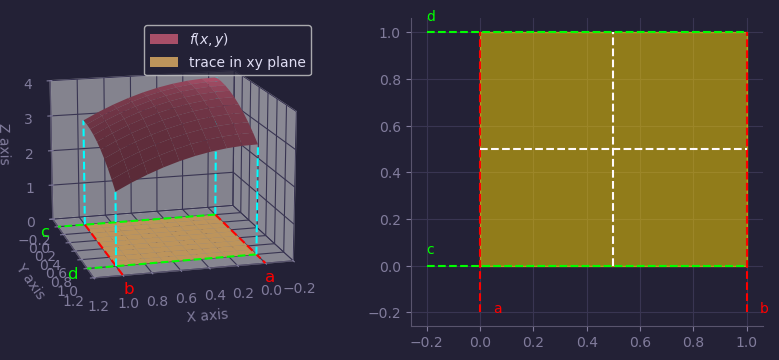

In [12]:
t = np.linspace(0, 1, 10)
x,y = np.meshgrid(t,t)
u = np.array([[0,0], [1,0], [1, 1], [0, 1]])
f = lambda x,y : 4 - x**2 - y**2

fig = plt.figure(figsize=(10, 4))

#########
# 3D function plot

ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(azim=75, elev=15)

ax.plot_surface(x, y, f(x,y), label=r'$f(x,y)$')
ax.plot_surface(x, y, np.zeros_like(x), label=r'trace in xy plane')

for i in range(4):
    ax.plot([u[i,0], u[i, 0]], [u[i,1], u[i,1]], [0, f(u[i,0], u[i,1])], ls='--', color='cyan')
    if i < 2:
        ax.plot([i,i],[0,1.2], ls='--', color='red')
        ax.plot([0,1.2],[i,i], ls='--', color='lime')


# helper text
ax.text(0 , 1.2, -0.5,'a', color='red', fontsize=12)
ax.text(1.0 , 1.2, -0.5, 'b', color='red', fontsize=12)

ax.text(1.3 , -0.2, -0.5,'c', color='lime', fontsize=12)
ax.text(1.3 , 0.8, -0.5,'d', color='lime', fontsize=12)


# figure properties
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_zlim(0, 4)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

#####################
# Trace plot in xy-plane

ax = fig.add_subplot(1,2,2)
ax.fill(u[:,0], u[:,1], alpha=0.5, color='gold')
for i in range(2):
    ax.plot([i,i],[-0.2,1], ls='--', color='red')
    ax.plot([-0.2,1],[i,i], ls='--', color='lime')

ax.plot([0.5,0.5],[0, 1], ls='--', color='snow')
ax.plot([0, 1],[0.5, 0.5], ls='--', color='snow')

labels = [['a', 'c'], ['b', 'd']]
for i in range(2):
    ax.text(i + 0.05, -0.2, labels[i][0], color='red')
    ax.text(-0.2, i + 0.05, labels[i][1], color='lime')

ax.grid(True)

Similar to 2D, the approximating procedure of 3D is as follows:
1. Assume (to closest) the projection of function of in xy-plane as a **rectangle**. (we will see for the case of general surfaces later)
2. Divide this rectangle into more smaller rectangles such that:
<br>A. Let *m* be the number of divisions across the *x-axis* each with length $\Delta x$.
<br>B. Let *n* be the number of divisons across the *y-axis* each with length $\Delta y$.
3. Pick any point $(x_k, y_k) within each subsectioned rectangles. (could be anywhere but usually the lower vertex or centroid is selected for ease)
4. Calculate the height, i.e. the value $f(_k,y_k)$.
5. Now we have the bottom surface area and the height. So we can calculate the volume for a subsectioned rectangle as: <br> 
$ V= \Delta x \Delta y f(x_k, y_k)$.
6. We can sum across each subsectioned rectangles to get approximation of entire volumen under the curve:<br><br>
$\displaystyle 
V \approx \sum_{i=1}^n \sum_{j=1}^m f(x_{ij}y_{ij}) \Delta x \Delta y$. <br><br>
7. To get the best approximations we would want the subsectioned rectangles to have as small area as possible, i.e. we want $\Delta x \to 0$ and $\Delta y \to 0$, <br><br>
$\displaystyle 
V = \lim\limits_{m,n \to \infty}\sum_{i=1}^n \sum_{j=1}^m f(x_{ij}y_{ij}) \Delta x \Delta y \\[1em]
\Rightarrow V = \int_a^b\int_c^d f(x,y) dy dx
$ <br><br>
The above term is referred to as **double integral**.

##### 2.1.3 Example

**Example**: Volume under $9 - x^2 - y^2$ above $[-2, 2] \times [-2,2]$

In [13]:
def get_rectangles(x_lim, y_lim):
    x = np.arange(x_lim[0], x_lim[1], 0.1)
    y = np.arange(y_lim[0], y_lim[1], 0.1)
    x, y = np.meshgrid(x,y)
    return np.stack((x.flatten(), y.flatten()))

vertex = np.array([
    [[-2, 0], [-2, 0]],
    [[0, 2], [-2, 0]],
    [[0, 2], [0, 2]],
    [[-2, 0], [0, 2]]
])

u = []
for i in range(4):
    u.append(get_rectangles(vertex[i][0], vertex[i][1]))

Steps:
1. Dividing the region $[-2,2]\times[-2,2]$ into n-rectangles (in our case 4 square).
2. Choosing a point in each region (in our case bottom edge of each squares).

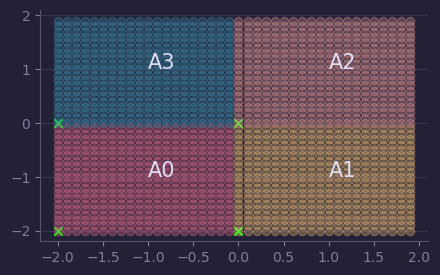

In [14]:

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)

p0 = np.array([[-2, 0, 0, -2], 
               [-2,-2,0,0]])

text_c  = [[-1,-1], [1, -1], [1,1], [-1,1]]
ax.scatter(p0[0], p0[1], color='lime', marker='x')
for n, i in enumerate(u):
    ax.scatter(i[0], i[1], alpha = 0.3)
    ax.text(text_c[n][0], text_c[n][1], f'A{n}', fontsize=15)

3. Volume $\approx \displaystyle \sum_{k=1}^4 f(x_k, y_k)\Delta x_k\Delta y_k$ (raising each of the 4-regions by height equivalent to $f(x_k, y_k)$ )

Intuitively this is just the sum of volumes of each cuboid under our function shown in graph below.

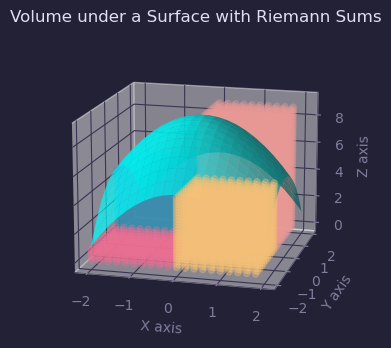

In [15]:
def get_cuboid(x_lim, y_lim, z_lim):
    x = np.arange(x_lim[0], x_lim[1], 0.2)
    y = np.arange(y_lim[0], y_lim[1], 0.2)
    z = np.arange(z_lim[0], z_lim[1], 0.2)
    x, y, z = np.meshgrid(x,y,z)
    return np.stack((x,y,z))

def f(x, y):
    return 9 - x**2 - y**2

x, y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))

c = []
for i in range(4):
    c.append(get_cuboid(
        x_lim=vertex[i][0],
        y_lim=vertex[i][1],
        z_lim=(0, f(p0[0,i], p0[1,i]))
    ))
    
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-75, elev=15)
ax.plot_surface(x, y, f(x,y), color='cyan', alpha=0.7)
for i in c:
    ax.scatter(i[0], i[1], i[2], alpha=0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Volume under a Surface with Riemann Sums');

**Note:** $\Delta x_k = \Delta y_k = 2$ (length of eah sides of rectanle). So, <br><br>
 Volume $\approx \displaystyle \Delta x_k \Delta y_k \sum_{k=1}^4 f(x_k, y_k) \approx 4\sum_{k=1}^4 f(x_k, y_k)$.

In [16]:
volume = 0
for i in range(4):
    volume += f(p0[0,i], p0[1,i]) * 2**2

print(f'Approximated volume under the curve: {volume}')

Approximated volume under the curve: 80


In [17]:
x, y = sp.symbols('x,y')
expr = 9 - x**2 - y**2
volume = sp.integrate(sp.integrate(expr, (y, -2, 2)), (x, -2, 2))
print(f'True volume under the curve: {float(volume):.4f}')

True volume under the curve: 101.3333


Ideally we would want the number of cuboids to be infinite which would give us the best approximation of volume under the curve.

`Note`: In case of approximation of volume using rectangular surfaces, the order of integral does not matter, i.e:<br><br>
$ \int_c^d \int_a^b f(x,y)dxdy = \int_a^b \int_c^d f(x,y)dxdy $ <br><br>
This is often referred to as **Fubini's Theorem**.

#### 2.2 Double Integration over General Regions

In most cases the projection of function $f(x,y)$ in bounded region R is not a rectangle. While we can approximate using infinite number of rectangles, we try to generalise the double integrals.

*Example* Volume of $f(x, y) = 1 + x + y^2$, bounded by x-axis, x=1 and $y = \sqrt{x}$

In [18]:
def f(x, y):
    temp = []
    for i in x:
        for j in y:
            if j <= i**0.5:
                temp.append([i,j, 1 + i + j**2])
    temp = np.array(temp)
    return temp

t = np.linspace(0, 1, 20)  
function_surface = f(t,t)

In [19]:
def get_crossection(x, y, z): 
    temp = []
    for k in y:
        for j in z:
            if j <= x**0.5 and k <= (1 + x + j**2):
                temp.append([x,j, k])
    temp = np.array(temp)
    return temp
t = np.linspace(0, 3, 60)  
crosssection = get_crossection(x=0.5, y=t, z=t)

In [20]:
def get_trace(x,y):
    temp = []
    for i in x:
        for j in y:
            if 1e-6 <= i**0.5 - j:
                temp.append([i,j])
    return np.array(temp)
t = np.linspace(0, 1, 20) 
trace = get_trace(t, t)

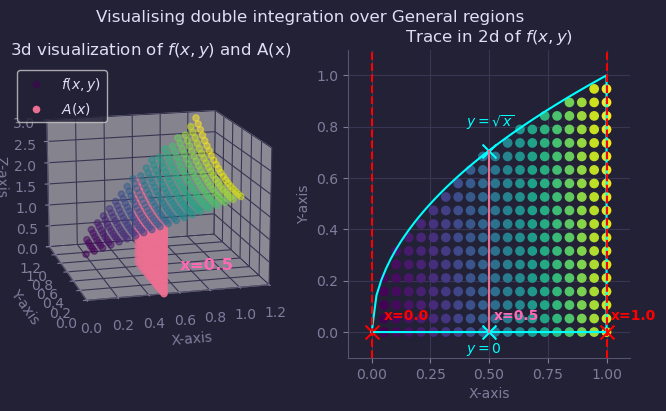

In [21]:
# for applying colormap to scatterplot
# Note the range in cmap is from 0-1 so, we divide cmap by number of elements in function output
fig = plt.figure(figsize=(8, 4))
fig.suptitle('Visualising double integration over General regions')

# 3-d plot
ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(azim=-105, elev=15)

# scatter plots
ax.scatter(function_surface[:,0], function_surface[:,1], function_surface[:,2], color = my_cmap(np.linspace(0, 1, function_surface.shape[0])), alpha=0.5, label=r'$f(x,y)$')
ax.scatter(crosssection[:,0], crosssection[:,1], crosssection[:,2], label=r'$A(x)$')

# helper text
ax.text (0.6, 0, 0.5, 'x=0.5', color='hotpink', fontsize=12, weight='bold')

# figure properties
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_zlim(0, 3)

ax.set_title('3d visualization of $f(x,y)$ and A(x)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# Trace plot
t = np.linspace(0, 1, 50)
ax = fig.add_subplot(1,2,2)

# main plots
ax.scatter(trace[:,0], trace[:,1], color=my_cmap(np.linspace(0, 1,trace.shape[0])))
ax.plot(np.append(t, [1,1,0]), np.append(t**0.5, [1,0,0]), color='cyan')
ax.plot([0.5, 0.5], [0, 0.5**0.5])

# additonal plots
ax.scatter([0, 1], [0, 0], color='red', marker='x', s = 100)
ax.scatter([0.5, 0.5], [0, 0.5**0.5], color='cyan', marker='x', s = 100)
ax.axvline(0, color='red', ls='--')
ax.axvline(1, color='red', ls='--')

# text helper
ax.text(0.52, 0.05, r'x=0.5', color='hotpink', weight='bold')
ax.text(0.05, 0.05, r'x=0.0', color='red', weight='bold')
ax.text(1.02, 0.05, r'x=1.0', color='red', weight='bold')
ax.text(0.4, 0.8, r'$y = \sqrt{x}$', color='cyan')
ax.text(0.4, -0.08, r'$y = 0$', color='cyan')

# figure properties
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Trace in 2d of $f(x,y)$')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.grid(True);

**Observations from above plot**:
1. Let us assume we are taking the volume under the surface along X-axis.
2. That is we move along x-axis and sum all the *pink* areas along each small $\Delta x$. <br>
Or<br>
In above plot $A(x)$ is show for x=0.5. Similiar cross sections are obtained by sweeping across x-axis and summed to get the volume.
3. In the 2d plot we can see while x bounded between 0 to 1, y is bounded 0 and $\sqrt{x}$.

Mathematically this can be written as:<br><br>
$\displaystyle
V = \int_0^1A(x)dx = \int_0^1 \int_0^{\sqrt x} (1 + x + y^2) dy dx
$

In [22]:
x, y = sp.symbols('x,y')
expr = 1 + x + y**2

volume = sp.integrate(sp.integrate(expr, (y, 0, x**0.5)).simplify(), (x, 0, 1))
print(f'Volume under f(x,y): {volume}')

Volume under f(x,y): 1.20000000000000


#### 2.3 Double Integration in Polar Coordinates

Polar $(r,\theta)$ - Cartesian Corordinate $(x, y)$ System Relationship:
$$ x = \cos\theta \qquad y = \sin \theta $$

(0.0, 1.5)

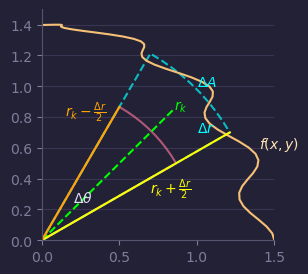

In [23]:
theta = np.linspace(np.pi/6, np.pi/3, 10)

x = np.concatenate(([0], np.cos(theta), [0]))
y = np.concatenate(([0], np.sin(theta), [0]))

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)

ax.plot(x, y, alpha=0.7)
ax.plot(1.4*x, 1.4*y, alpha=0.7, color='cyan', ls='--')
ax.plot(
    1.4*np.cos(np.linspace(0, np.pi, 100)) + 0.1 *np.cos(np.linspace(0,50, 100)),
    1.4*np.sin(np.linspace(0, np.pi, 100)) ,
)
ax.plot([0,1.2*np.cos(np.pi/4)],[0,1.2*np.sin(np.pi/4)], color='lime', ls='--' )
ax.plot([0,1.4*np.cos(np.pi/6)],[0,1.4*np.sin(np.pi/6)], color='yellow')
ax.plot([0,np.cos(np.pi/3)],[0,np.sin(np.pi/3)], color='orange')

# helper text
ax.text(1, 0.7, r'$\Delta r$', color='cyan')
ax.text(1, 1, r'$\Delta A$', color='cyan')
ax.text(0.2, 0.25, r'$\Delta \theta$')
ax.text(0.85, 0.85, r'$r_k$', color='lime')
ax.text(0.7, 0.3, r'$r_k + \frac{\Delta r}{2}$', color='yellow')
ax.text(0.15, 0.8, r'$r_k - \frac{\Delta r}{2}$', color='orange')
ax.text(1.4, 0.6, r'$f(x,y)$',color='moccasin')

# figure properties
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)

In polar coordinates system the change in area : <br><br>
$ \Delta A = $ Area of big wedge - Area of small wedge <br><br>
$ \Rightarrow \Delta A = \big(\frac{\Delta \theta}{2\pi} \big) * \pi \big( \big[r_k + \frac{\Delta r}{2}\big]^2 - \big[r_k - \frac{\Delta r}{2}\big]^2 \big) \\[1em]
\Rightarrow \Delta A = \big(\frac{\Delta \theta}{2\pi} \big) * \pi \big( \big( 2 r_k \big) \times \big(2 \cdot \frac{\Delta r}{2}  \big)\big) \\[1em]
\Rightarrow \Delta A = r_k \Delta r \Delta \theta
$
<br><br> So the volumes become:
$ \displaystyle V \approx = \sum_{k=1}^n f(r_k , \theta_k) r_k \Delta r \Delta \theta $
<br><br> as the $\Delta r\to 0$ and $\Delta \theta \to 0$ the following expression becomes: <br><br>
$ V = \displaystyle \int_{\theta_1}^{\theta_2} \int_{r_1(\theta)}^{r_2(\theta)} f(r, \theta) r dr d\theta $

In [24]:
t = np.linspace(-10, 10, 100)
temp = []
for k in t:
    for i in t:
        for j in t:
            if i**2 + j**2 <= 1 and k <= 4 - i - 2*j :
                temp.append([i, j , k ])

temp = np.array(temp)

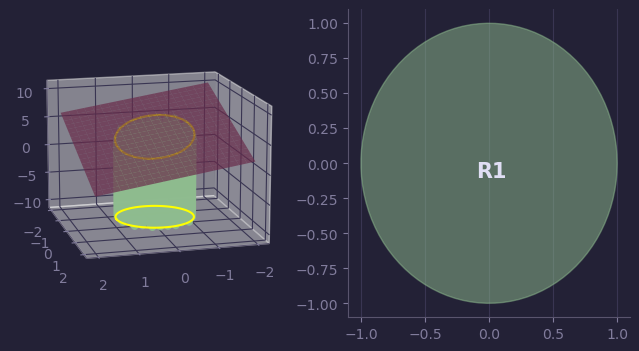

In [25]:
t = np.linspace(0, 2*np.pi, 100)
x,y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))

fig = plt.figure(figsize=(8,4))

# 3d plot of volume over circle
ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(azim=75, elev=14)

# plotting plane
ax.plot_surface(x,y,4-x-2*y, color='hotpink', alpha=0.7)

# plotting circles and volume
ax.plot(np.cos(t), np.sin(t), 4 - np.cos(t) - 2*np.sin(t), color='yellow')
ax.plot(np.cos(t), np.sin(t), -10*np.ones_like(t), color='yellow')
ax.scatter(temp[:,0], temp[:,1], temp[:,2], color='darkseagreen')


# plotting trace
ax = fig.add_subplot(1,2,2)

ax.fill(np.cos(t), np.sin(t), color='darkseagreen', alpha=0.5)
ax.text(-0.1,-0.1, 'R1', weight='bold', fontsize=15)
ax.grid();

In [26]:
r,t = sp.symbols('r,t')
f = 4 - r*sp.cos(t) - 2*sp.sin(t)
volume = sp.integrate(sp.integrate(f*r, (r, 0, 1)), (t, 0, 2*sp.pi))
print(f'Volume under the plane bounded by circle: {volume}')

Volume under the plane bounded by circle: 4*pi


#### 2.4 Gaussian Integral

Consider the plot of the function $f(x) = e^{-x^2}$

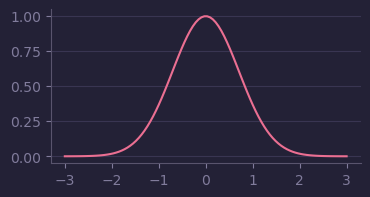

In [27]:
t = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1,1,1)
ax.plot(t, np.exp(-t**2));

This resmebles the typical gaussian distribution which is an important probablity distinution funtion in statistics. While for standard normal distribution area is 1, what is the area under the curve f(x).
<br>Using the concept of integrals, area is simply equal to : <br><br>
$\displaystyle A = \int_{-\infty}^{\infty} e^{-x^2}dx $
<br><br>The problem is that this intgeral is not simplifiable using single integral. (one can try by substituting $-x^2$ as u $\Rightarrow -2xdx = du$)
<br><br> But it happens to be solvable by double integral. So first we develop the intuition for it.<br><br>
$\displaystyle I = \int_{-\infty}^{\infty} e^{-x^2}dx \\[1em]
\Rightarrow I^2 = \left(\int_{-\infty}^{\infty} e^{-x^2}dx \right)\left(\int_{-\infty}^{\infty} e^{-x^2}dx \right)
$ <br><br>
Note 'x' is a dummy variable and can be replaced by 'y' in second bracket.<br><br>
$\displaystyle
\Rightarrow I^2 = \left(\int_{-\infty}^{\infty} e^{-x^2}dx \right) \left(\int_{-\infty}^{\infty} e^{-y^2}dy \right) \\[1em]
\Rightarrow I^2 = \left(\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-x^2-y^2} dx dy \right) 
$
<br><br> Now we plot this function to get intuition for next step.

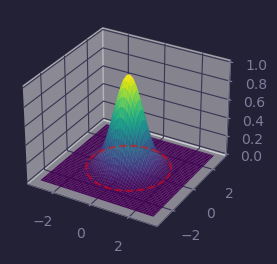

In [28]:
t = np.linspace(-3, 3, 100)
theta = np.linspace(0, 2*np.pi, 100)
x, y = np.meshgrid(t, t)
f = lambda x,y : np.exp(-x**2 - y**2)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1, projection='3d')
# surface plot of function
ax.plot_surface(x, y, f(x,y), cmap='viridis')
ax.plot(2*np.cos(theta), 2*np.sin(theta), np.zeros_like(theta), color='red', alpha=0.5, ls='--');

What we can see is in 3d our function $e^{-x^2-y^2}$ has this circular symmetry near its base (irrespective of where one stands near the base the surface would appear to be similar). <br>
This intuitively leads to us the conclusion that we must use circular coordinate system to solve our problem. So our integral becomes: <br><br>
$\displaystyle
\Rightarrow I^2 = \left(\int_{0}^{2\pi} \int_{0}^{\infty} e^{-r^2} rdr d\theta \right)
$ <br><br>
Note that the integral limit in polar coordinate is the repersentation of entire xy-plane in Cartesian coordinates. Now if we let $-r^2 = u \Rightarrow -2rdr = du$ and substitute into integral, it simplifies as: <br><br>
$\displaystyle
\Rightarrow I^2 = \left(\int_{0}^{2\pi} \frac{-1}{2}e^{u}\Biggr|_0^{-\infty} d\theta \right) \\[1em] 
\Rightarrow I^2 = \left(\int_{0}^{2\pi} \frac{1}{2}d\theta \right) \\[1em] 
\Rightarrow I^2 =  \frac{1}{2}2\pi = \pi \\[1em] 
\Rightarrow I =  \int_{-\infty}^{\infty} e^{-x^2}dx  = \sqrt{\pi}
$

In [29]:
x = sp.symbols('x')
sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo))

sqrt(pi)

### 3. Triple Integrals

#### 3.1 Intuition

Comparing different integrals:
- Area between two curves is found using single integrals
- Volume between two areas is found using double integrals
- **So the volume between two volumes can be found using triple integrals**.

Consider the plot below.

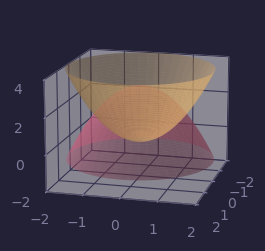

In [30]:
r = np.linspace(0, 2, 100)
theta = np.linspace(0, 2 * np.pi, 100)
r, theta = np.meshgrid(r, theta)
x = r*np.cos(theta)
y = r*np.sin(theta)

z1 = np.stack((x,y, 3 - x**2 -y**2))
z2 = np.stack((x,y, x**2 + y**2))

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.view_init(azim=15, elev=15)
for i in (z1, z2):
    ax.plot_surface(i[0], i[1], i[2], alpha=0.5)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 4);

Triple integral is used to find the volume between this two paraboloids. The derivation of fromulation is discussed later.

#### 3.2 Integrable Functions of Three Variables

Let there be a region B (box) in $\mathbb{R}^3$ such that: <br><br>
$ B = \big\{(x,y,z)\,|\,a \leq x \leq b, \, c \leq y \leq d, \, e \leq z \leq f \big\}$ <br><br>
We divide intervals [a,b], [c,d] and [e,f] into l, m and n subintervals respectively. Mathematically: <br><br>
$\displaystyle
\Delta x = \frac{x_i - x_{i-1}}{l}, \\[1em]
\Delta y = \frac{y_i - y_{i-1}}{m}, \\[1em]
\Delta z = \frac{z_i - z_{i-1}}{n}  
$ <br><br>
For each *i*,*j*, and *k*, consider a sample point $(x^*_{ijk},y^*_{ijk},z^*_{ijk})$ in each sub-box $B_{ijk}$. We see that its volume is $\Delta V= \Delta x \Delta y \Delta z$. Form the triple Riemann sum: <br><br>
$ \displaystyle \sum_{i=1}^l \sum_{j=1}^m \sum_{k=1}^n f ( x_{ijk}^*, y_{ijk}^*, z_{ijk}^*)\,\Delta x \Delta y \Delta z$ <br><br>
then triple integral is defined as:<br><br>
$\displaystyle
\lim_{l,m,n\rightarrow\infty} \sum_{i=1}^l \sum_{j=1}^m \sum_{k=1}^n f ( x_{ijk}^*, y_{ijk}^*, z_{ijk}^*)
\, \Delta x \Delta y \Delta z = \iiint_B f(x,y,z) \,dV 
$ <br><br>
**Fubini's Theorem for Triple Integrals** : If $f(x,y,z)$ is continuous on a rectangular box $B = [a,b]\times[c,d] \times[e,f]$, the order of triple integrals is interchangable.

*Example*: $\iiint_B z \, \sin \, x \, \cos \, y \, dV$ <br><br> where $B = \big\{(x,y,z)\,|\,0 \leq x \leq \pi, \, \dfrac{3\pi}{2} \leq y \leq 2\pi, \, 1 \leq z \leq 3 \big\}$

In [31]:
x,y,z = sp.symbols('x,y,z')
f = z*sp.sin(x)*sp.cos(y)
ft = sp.integrate(f, (x, 0, sp.pi), (y, 1.5*sp.pi, 2*sp.pi), (z, 1, 3))
print(f'Triple integral : {ft}')

Triple integral : 8


#### 3.3 Triple Integrals over a General Bounded Region

The triple integral of a continuous function $f(x,y,z)$ over a general three-dimensional region: <br><br>
$E = \big\{(x,y,z)\,|\,(x,y) \in D, \, u_1(x,y) \leq z \leq u_2(x,y) \big\}$ <br><br>
in $\mathbb{R}^3$, where $D$ is the projection of $E$ onto the $xy$-plane, is <br><br>
$ \displaystyle \iiint_E f(x,y,z) \,dV = \iint_D \left[\int_{u_1(x,y)}^{u_2(x,y)} f(x,y,z) \,dz \right] \, dA$

*Example* : Evaluate the triple integral of the function $f(x,y,z)=5x−3y$ over the solid tetrahedron bounded by the planes $x=0,y=0,z=0$, and $x+y+z=1$.

In [32]:
f = []
t = np.linspace(0, 1, 20)
for i in t:
    for j in t:
        for k in t:
            if j < 1-i and k < 1 - i - j:
                f.append([i, j, k])
f = np.array(f)
f.shape

(1469, 3)

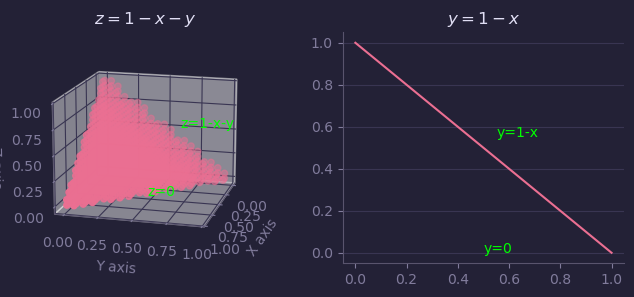

In [33]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(azim=15, elev=15)

# plotting tetrahedron
ax.scatter(f[:, 0], f[:, 1], f[:,2])

# hepler text
ax.text(0.6, 0.5, 0, 'z=0', color='lime')
ax.text(0.0, 0.6, 0.5, 'z=1-x-y', color='lime')

# figure properties
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_title(r'$z = 1-x-y$')

ax = fig.add_subplot(1,2,2)
t = np.linspace(0, 1, 10)
ax.plot(t, 1-t)

ax.text(0.5, 0.0, 'y=0', color='lime')
ax.text(0.55, 0.55, 'y=1-x', color='lime')
ax.set_title(r'$y=1-x$');

- From left plot we can see limits for z are: $0\leq z\leq 1-x-y$.
- From right plot we can see limits for y are: $0 \leq y \leq 1-y$.
- Also from right plot we can see limits of x are: $0 \leq x \leq 1$.

In [34]:
x,y,z = sp.symbols('x,y,z')
f = 5*x - 3*y
ft = sp.integrate(f, (z,0, 1-x-y), (y, 0, 1-x), (x, 0, 1))
print(f'triple integral of function f(x,y,z) = 5x - 4y for given constraints: {ft}')

triple integral of function f(x,y,z) = 5x - 4y for given constraints: 1/12


#### 3.4 Changing the Order of Integration

With a triple integral over a general bounded region, choosing an appropriate order of integration can simplify the computation quite a bit. Sometimes making the change to polar coordinates can also be very helpful. We demonstrate two examples here.
<br><br>
Example: Evaluate $\displaystyle \iiint_E$ where E is the region bounded by the paraboloid $y = x^2 + z^2$ and the plane $y=4$.<br><br>
Limits for standard integral order: <br>

$E = {(x,y,z) | -2 \leq x 2, x^2 \leq y \leq 4, -\sqrt{y-x^2} \leq z \leq \sqrt{y-x^2}}$ 

<br>The triple integral becomes: <br>

$\displaystyle
\iiint_E \sqrt{x^2 + z^2} \,dV = \int_{x=-2}^{x=2} \int_{y=x^2}^{y=4} \int_{z=-\sqrt{y-x^2}}^{z=\sqrt{y-x^2}} \sqrt{x^2 + z^2} \,dz \, dy \, dx.
$ 

<br>This expression is difficult to compute, so consider the projection of E onto the xz-plane. This is a circular disc $x^2+z^2 \leq 4$. So we obtain: <br>

$\displaystyle
\int_{x=-2}^{x=2} \int_{z=\sqrt{4-x^2}}^{z=\sqrt{4-x^2}} \int_{y=x^2+z^2}^{y=4} \sqrt{x^2 + z^2} \,dy \, dz \, dx = 
\int_{x=-2}^{x=2} \int_{z=-\sqrt{4-x^2}}^{z=\sqrt{4-x^2}} (4 - x^2 - z^2) \sqrt{x^2 + z^2} \,dz \, dx.
$

<br>Now we polar coordinates in the xy-plane, expcept we are replacing y by z. Consequently the limits of integration change and we have, by using $r^2=x^2+z^2$, <br>

$\displaystyle \Rightarrow
\int_{\theta=0}^{\theta=2\pi} \int_{r=0}^{r=2} (4 - r^2) rr \, dr \, d\theta = \int_0^{2\pi} \left. \left[ \dfrac{4r^3}{3} - \dfrac{r^5}{5} \right|_0^2 \right] \, d\theta = \int_0^{2\pi} \dfrac{64}{15} \,d\theta = \dfrac{128\pi}{15}$

#### 3.5 Average Value of a Function of Three Variables

If $f(x,y,z)$ is integrable over a solid bounded region $E$ with positive volume $V(E)$, then the average value of the function is <br>

$\displaystyle f_{ave} = \dfrac{1}{V \, (E)} \iiint_E f(x,y,z) \, dV$

<br>Note that the volume is <br>

$\displaystyle V \, (E) = \iiint_E 1 \,dV$

Example: The temperature at a point $(x,y,z)$ of a solid E bounded by the coordinate planes and the plane $x+y+z=1$ is $T(x,y,z)=(xy+8z+20) ^\circ C$. Find the average temperature over the solid.

In [35]:
x, y, z = sp.symbols('x,y,z')
T = x*y + 8*z + 20
avgT = sp.integrate(T, (z,0, 1-x-y), (y, 0, 1-x), (x, 0, 1)) 
V = sp.integrate(1, (z,0, 1-x-y), (y, 0, 1-x), (x, 0, 1)) 
print(f'Average value of temperature of the solid: {avgT / V} C') 

Average value of temperature of the solid: 441/20 C


#### 3.5 Triple Integrals in Cylindrical and Spherical Coordinates 

##### 3.5.1 Cylindrical Coordinates

Triple integral in cylindrical coordinates: <br>

$ B = \{(r, \theta) |G_1 (\theta) \leq r \leq g_2(\theta), \alpha \leq \theta \leq \beta \} $

<br> and we have <br>

$ \displaystyle
\int_{\theta=\alpha}^{\theta=\beta} \int_{r=g_1(\theta)}^{r=g_2(\theta)} \int_{z=u_1(r,\theta)}^{z=u_2(r,\theta)} f(r,\theta,z)\, r \, dz \, dr \, d\theta.
$

<br>Example : Finding Volume of region bounded below by the cone $z = \sqrt{x^2 + y^2}$ and paraboloid $z = 2 - x^2 - y^2$.
<br>Stepwise solution:<br>
1. Converting to polar coordinates: Cone : $z = r$ and paraboloid : $z = 2 - r^2$
2. Solving for intersecting surface: Equating the expressions of z,<br> 

$\Rightarrow r = 2-r^2 \\[1em]
 \Rightarrow r^2 + 2r - 2 = 0 \\[1em]
 \Rightarrow (r+2)(r-1) = 0 \\[1em]
 \Rightarrow r=1 = z
 $

 <br>Therefore the intersecion of two surfaces is a circle in xy-plane z=1.<br>
 Therefore the region between cone and paraboloid is given by:<br>
 $E = \{(r, \theta, z) |0 \leq \theta \leq 2\pi, \, 0 \leq r \leq 1, \, r \leq z \leq 2 - r^2 \} $

In [36]:
r, t, z = sp.symbols('r,t,z')
volume = sp.integrate(sp.integrate(r, (z, r, 2-r**2)),(r,0, 1), (t, 0, 2*sp.pi))
print(f'volume of the region: {volume}')

volume of the region: 5*pi/6


##### 3.5.2 Spherical Coordinates

From spherical coordinates to rectangular coordinates:
$$ x = \rho \, \sin \, \varphi \, \cos \theta, \, y = \rho \, \sin \, \varphi \, \sin \, \theta, \, and \, z = \rho \, \cos \, \varphi $$
From rectangular coordinates to spherical coordinates:
$$ \rho^2 = x^2 + y^2 + z^2, \, \tan \, \theta = \frac{y}{x}, \, \varphi = \arccos \left( \frac{z}{\sqrt{x^2 + y^2 + z^2}}\right) $$

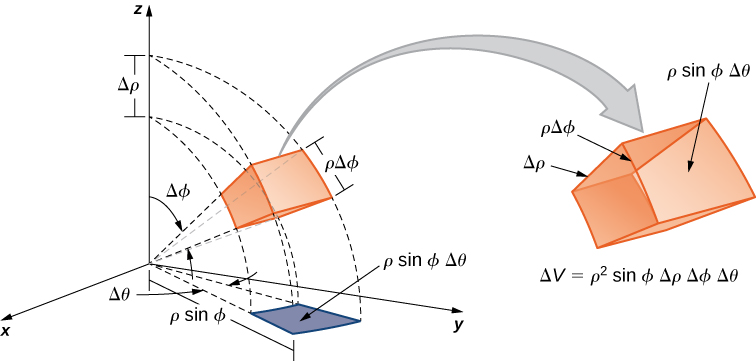
Reference: [Integration in Spherical Coordinates](https://math.libretexts.org/Courses/Oxnard_College/Multivariable_Calculus/03%3A_Multiple_Integration/3.06%3A_Triple_Integrals_in_Cylindrical_and_Spherical_Coordinates)


So In spherical coordinates dV = $dxdydz = \rho^2\sin\phi\; d\rho\;d\phi\;d\theta$ and the integral becomes: <br><br>
$\displaystyle V = \int_{\varphi=\gamma}^{\varphi=\psi} \int_{\theta=\alpha}^{\theta=\beta} \int_{\rho=a}^{\rho=b} f(\rho,\theta,\varphi) \, \rho^2 \sin \, \varphi \, d\rho \, d\varphi \, d\theta$

<br> Example: Finding the volume between region bounded by cone $z = \sqrt{3(x^2 + y^2)}$ and the hemisphere $z = \sqrt{4-x^2-y^2}$

Stepwise solution:
1. Converting to spherical coordinates:<br>
For cone: $z = \sqrt{3(x^2+y^2)} \Rightarrow \rho\cos\phi = \sqrt{3}\rho\sin\phi \Rightarrow \phi = \frac{\pi}{6}$ <br>
For sphere: $z = \sqrt{4-x^2-y^2} \Rightarrow x^2+y^2+z^2 = 4 \Rightarrow \rho = 2$.
2. Finding integral limits:
E = $\{ (\theta, \phi, \rho) \; | \; 0 \leq \theta\leq 2\pi, 0\leq\phi\leq\pi/6, 0\leq\rho\leq 2 \}$
3. Evaluating integral:

In [37]:
t, p, r = sp.symbols('t,p,r')
volume = sp.integrate(
    r**2*sp.sin(p) , 
    (r, 0, 2), (p, 0, sp.pi/6), (t, 0, 2*sp.pi)).simplify()
print(f'volume bounded by region: {volume}')

volume bounded by region: 8*pi*(2 - sqrt(3))/3


### 4. Change of Variables

#### 4.1. Single Variable Transformation

Recalling the Subsitution Rule method of single integration: 

- $\displaystyle \int_a^b f(x)\;dx = \int_c^d f(g(u)) g'(u)\;du$

- where $[a,b]\in \text{x-axis}$ and $[c,d]\in \text{u-axis}$.

- $c = g(a)$ and $d = g(b)$.
- Generally, the function that we use to change the variables to make the integration simpler is called a **transformation or mapping**.


#### 4.2 One-to-One functions

Drawing analogy from single variable, the subsitution will be done for both *x* and *y*, i.e along a planar region. 
- Let $R\in (x,y)$ and $S\in (x,y)$, then a transformation $T: G \rightarrow R$ is said to be a *one-to-one transformation* if no two points map to the same image point. 
- Mathematically: $T(u_1,v_1) = T(u_2,v_2) \Rightarrow (u_1,v_1) = (u_2,v_2)$

<br>Example: Transformation $T(u,v) = (x,y)$, where $x = u^2 - v^2$ and $y = uv$. Find the image of the traingle in the $uv$-plane with vertices (0,0), (0,1) and (1,1).

In [38]:
t = np.linspace(0, 2, 40)
temp = []
for i in t:
    for j in t:
        if j > i and j < 1 and i < 1:
            temp.append([i, j])

temp = np.array(temp)

x = temp[:,0]**2 - temp[:,1]**2
y = temp[:,0] * temp[:,1]

Text(0, 0.5, 'y axis')

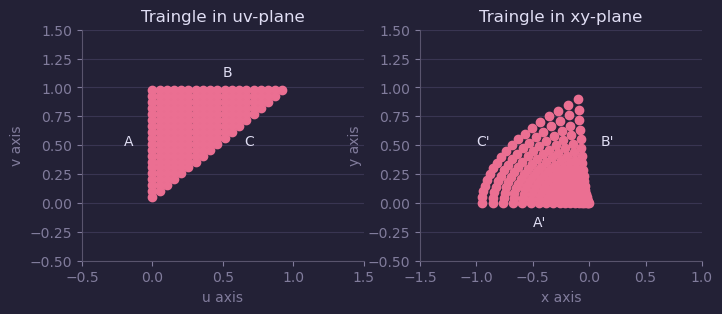

In [39]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,2,1)
# main plot
ax.scatter(temp[:,0], temp[:,1])

# helper text
ax.text(-0.2, 0.5, 'A')
ax.text(0.5, 1.1, 'B')
ax.text(0.65, 0.5, 'C')

# figure properties
ax.set_title('Traingle in uv-plane')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('u axis')
ax.set_ylabel('v axis')


ax = fig.add_subplot(1,2,2)
# main transformed plot
ax.scatter(x, y)

# helper text
ax.text(-0.5, -0.2, "A'")
ax.text(0.1, 0.5, "B'")
ax.text(-1, 0.5, "C'")

# figure properties
ax.set_title('Traingle in xy-plane')
ax.set_xlim(-1.5, 1)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

#### 4.3 Jacobians

The *Jacobian* of the contiuous transformation $T(g(u,v), h(u,v))$ is denoted by J(u,v) and is defined by the 2x2 determinant.
$$J(u,v) = \left|\frac{\partial (x,y)}{\partial (u,v)} \right| = \begin{vmatrix} \dfrac{\partial x}{\partial u} & \dfrac{\partial y}{\partial u} \\ \dfrac{\partial x}{\partial v} & \dfrac{\partial y}{\partial v} \end{vmatrix} = \left( \frac{\partial x}{\partial u}\frac{\partial y}{\partial v} - \frac{\partial x}{\partial v} \frac{\partial y}{\partial u}\right).$$

Note that the Jacobian is frequently denoted simply by:
$$J(u,v) = \frac{\partial (x,y)}{\partial (u,v)}$$

Let $T(u,v)=(x,y)$ where $x=g(u,v)$ and $y=h(u,v)$ be a one-to-one continuous transformation, with a nonzero Jacobian on the interior of the region S in the uv-plane it maps S into the region R in the xy-plane. If f is continuous on R, then
$$\iint_R f(x,y) dA = \iint_S f(g(u,v), \, h(u,v)) \left|\frac{\partial (x,y)}{\partial(u,v)}\right| du \, dv$$

##### 4.3.1 Example 1

Example: Given Region bound by following lines:
$$ y = -2x \qquad y = \frac{x}{2} - \frac{15}{2} \\[1em]
y = 2x + 10  \qquad y = \frac{x}{2}$$
Given Transformation $x = u + 2v, y = v - 2u$. Now we try to find the area of region in new axes.

In [40]:
x, y , u, v = sp.symbols('x,y,u,v')
xy_curves = [y+2*x, 2*y - x + 15, y + 2*x -10, 2*y-x]
x0 = u + 2*v
y0 = v - 2*u

uv_curves = [i.subs({x:x0, y:y0}) for i in xy_curves]
new_bounds = [sp.solve(i) for i in uv_curves]
J = sp.Matrix([x0,y0]).jacobian(sp.Matrix([u, v]))

print(
      f'Bounding curves in uv-plane:\n{uv_curves}',
      f'\n\nBounding limits obtained from these curves:\n{new_bounds}',
      f'\n\nJacobian matrix:\n{J}',
      f'\n\nDetermininat of Jacobian: {J.det()}'
)

Bounding curves in uv-plane:
[5*v, 15 - 5*u, 5*v - 10, -5*u] 

Bounding limits obtained from these curves:
[[0], [3], [2], [0]] 

Jacobian matrix:
Matrix([[1, 2], [-2, 1]]) 

Determininat of Jacobian: 5


In [41]:
expr = x0 + y0
volume = sp.integrate(expr*J.det(), (u, 0, 3), (v, 0, 2))
print(f'Volume found after applying transformation: {volume}')

Volume found after applying transformation: 45


`Note`: To integrate within orignal axes, we would have to divide the region into various sub-regions, while after transformation we have a rectangle, which can be integrated easilt.

##### 4.3.2 Example 2

Evaluate $\displaystyle \iint xy^2 dA$ over region R bounded by following curves:
$$xy=1 \qquad xy=2 \qquad y=x \qquad y=2x$$

Stepwise solution:
- We can see that $xy=1$ and $xy=2$ are two bounds. To define a new transformation we would like atleast one of the new variables to have constant limits. This can be achieved by substituting $x=\frac{u}{v}$ and $y=v$.

In [42]:
x,y,u,v = sp.symbols('x,y,u,v')
xy_curves = [x*y-1, x*y-2, y-x, y-2*x]
x0 = u/v
y0 = v
uv_curves = [i.subs({x:x0, y:y0}) for i in xy_curves]
new_bounds = [sp.solve(i) for i in uv_curves]
J = sp.Matrix([x0,y0]).jacobian(sp.Matrix([u, v]))

print(
      f'Bounding curves in uv-plane:\n{uv_curves}',
      f'\n\nBounding limits obtained from these curves:\n{new_bounds}',
      f'\n\nJacobian matrix:\n{J}',
      f'\n\nDetermininat of Jacobian: {J.det()}'
)

Bounding curves in uv-plane:
[u - 1, u - 2, -u/v + v, -2*u/v + v] 

Bounding limits obtained from these curves:
[[1], [2], [{u: v**2}], [{u: v**2/2}]] 

Jacobian matrix:
Matrix([[1/v, -u/v**2], [0, 1]]) 

Determininat of Jacobian: 1/v


Note: 
- New bounds  for u-axes are $[1, 2]$, that would imply it should be outermost limits, 
- That would also imply that v should be a function of u. So limits of v are $[\sqrt{u}, \sqrt{2u}]$ 

Thus the integral would be
$$\int_1^2\int_{\sqrt{u}}^{\sqrt{v}} \left( \frac{u}{v} \right) (v^2) \left( \frac{1}{v} \right)\;dv\;du $$

In [43]:
expr = x0 * y0**2
volume = sp.integrate(expr*J.det(),(v, u**0.5, (2*u)**0.5), (u, 1, 2))
print(f'Volume found after applying transformation: {volume}')

Volume found after applying transformation: 0.771572875253810


#### 4.4 Verifying Jacobians for Cylindrical and Spherical Transformations

##### 4.4.1 Cylindrical Trasnformation

In [44]:
r, t = sp.symbols('r,t')
x = r*sp.cos(t)
y = r*sp.sin(t)
J = sp.Matrix([x,y]).jacobian(sp.Matrix([r,t]))
display(J)
print(f'Determinant of Jacobian: {J.det().simplify()}')

Matrix([
[cos(t), -r*sin(t)],
[sin(t),  r*cos(t)]])

Determinant of Jacobian: r


##### 4.4.2 Spherical Transformation

In [45]:
rho, phi, theta = sp.symbols('rho,phi,theta')
x = rho*sp.sin(phi)*sp.cos(theta)
y = rho*sp.sin(phi)*sp.sin(theta)
z = rho*sp.cos(phi)
J = sp.Matrix([x,y,z]).jacobian(sp.Matrix([rho, phi, theta]))
display(J)
print(f'Determinant of Jacobian:')
display(J.det().simplify())

Matrix([
[sin(phi)*cos(theta), rho*cos(phi)*cos(theta), -rho*sin(phi)*sin(theta)],
[sin(phi)*sin(theta), rho*sin(theta)*cos(phi),  rho*sin(phi)*cos(theta)],
[           cos(phi),           -rho*sin(phi),                        0]])

Determinant of Jacobian:


rho**2*sin(phi)